# Denoising Data using Fast Fourier Transform
In this post, we will show how to denoise data using Fast Fourier Transform. We will transform an array of time-domain wave-form data to an array of frequency-domain spectrum data. To know more about this visit [databookuw.com](http://databookuw.com/). 

In this post, we will create a simple data set which is the sum of two sine waves with different frequencies. Then we add noise with this data set. We use FFT to pull out the original data from denoise. We use Python Numpy library to deal data and use Python Matplotlib.pyplot to visualize the data. This basic example has an interesting application to analyze train-track vibration data. 

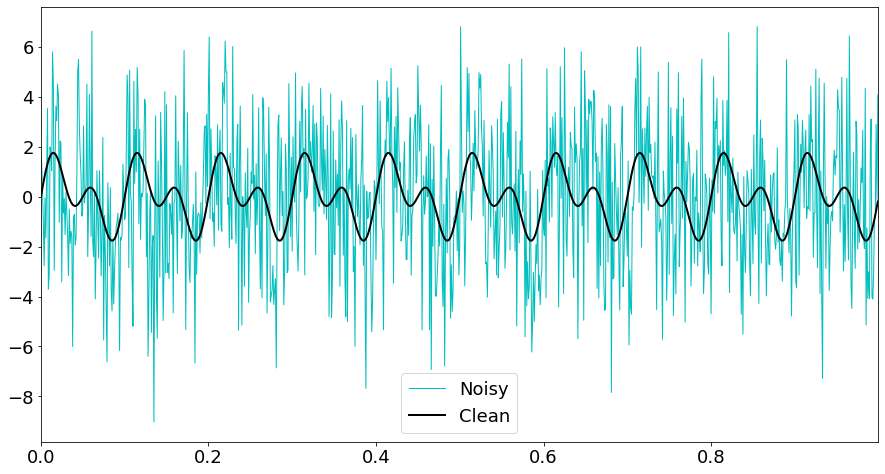

In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams.update({'font.size' : 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
f_clean = f 
f = f + 2.5*np.random.randn(len(t)) 

plt.plot(t,f,color='c', LineWidth=1,label='Noisy')
plt.plot(t,f_clean, color='k', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

/Users/alamgir/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


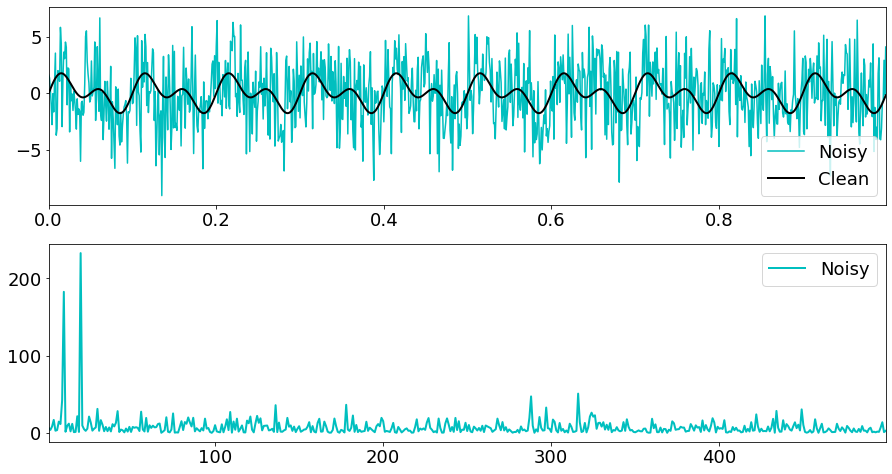

In [46]:
n = len(t)
fhat = np.fft.fft(f,n) # Compute the FFT 
PSD = fhat * np.conj(fhat) / n # Power spectrum per f
freq = (1/(dt*n)) * np.arange(n) # Create x-axis of frequencies
L = np.arange(1, np.floor(n/2), dtype='int') #only plot the first half of

fig, ax = plt.subplots(2,1) 
plt.sca(ax[0])
plt.plot(t, f, color='c', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(ax[1])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

In [47]:
# Use the PSD to filter out noise
indices = PSD > 100 # Find all frequencies with large power
PSDclean = PSD * indices # Zero out all others
fhat = indices * fhat # Zero out small Fourier coefficient in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

/Users/alamgir/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/alamgir/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/alamgir/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


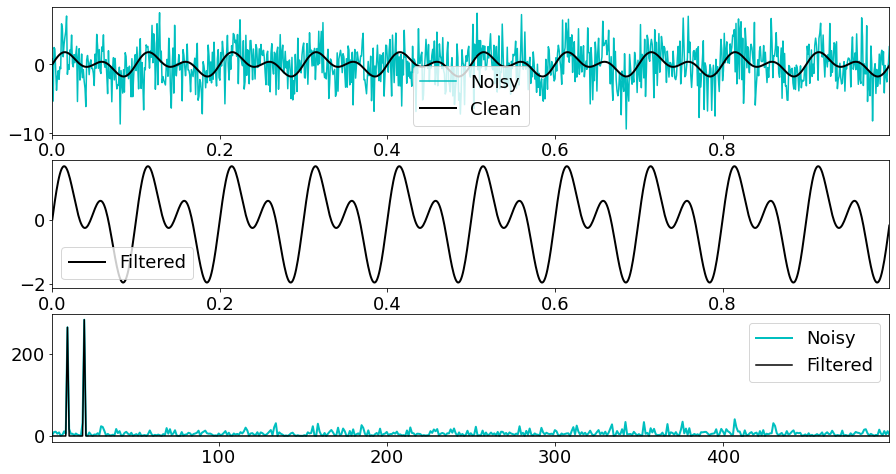

In [44]:
fig, ax = plt.subplots(3,1) 
plt.sca(ax[0])
plt.plot(t, f, color='c', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='k', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(ax[1])
plt.plot(t, ffilt, color='k', LineWidth=2, label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(ax[2])
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='k', LineWidth=1.5, label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

## Resources 
- Interesting blog post: [Vibration Analysis: FFT, PSD, and Spectrogram Basics](https://blog.endaq.com/vibration-analysis-fft-psd-and-spectrogram)
- Youtube Lecture: [Denoising Data with FFT](https://www.youtube.com/watch?v=s2K1JfNR7Sc)